In [1]:
#import knižníc

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# Načítanie vstupných dát
df = pd.read_csv('heart.csv')
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [3]:
# import 303 premených vstup = vek,pohlavie,tep v kludnom stave a maximálny dosiahnutý tep
# y = stav 1 pre mal alebo je v rizikovej skupine  pre infarkt 0 pre neaml infarkt alebo sa nenachádza v rizikovej skupine

#vybratie výstupnych údajov a priradenie do premenej
vstup = df.iloc[0:302,[0,1,4,7]].values
#maticax_trenovacia = df.iloc[0:302,[0,1,4,7]].values
#maticax_testovacie = df.iloc[0:302,[0,1,4,7]].values

#vybratie výstupnych údajov a priradenie do premenej
y = df.iloc[0:302,[13]].values
#maticay_trenovacia = np.where((df.iloc[0:302,13]) == 1 ,-1,1)
#maticay_testovacie = np.where((df.iloc[0:302,13]) == 1 ,-1,1)

#vytvorenie premených pre trénovanie a testovanie
maticax_trenovacia, maticax_testovacie, maticay_trenovacia, maticay_testovacie = train_test_split(vstup, y, test_size=0.30)


In [4]:
# prenesenie dát do nového datafamu pre vytvorenie párového grafu
df1 = pd.DataFrame()
df1['age'] = df['age']
df1['sex'] = df['sex']
df1['trtbps'] = df['trtbps']
df1['thalachh'] = df['thalachh']
df1['output'] = df['output']
# výpis dataframu s dátami
df1

age  sex  trtbps  thalachh  output
0     63    1     145       150       1
1     37    1     130       187       1
2     41    0     130       172       1
3     56    1     120       178       1
4     57    0     120       163       1
..   ...  ...     ...       ...     ...
298   57    0     140       123       0
299   45    1     110       132       0
300   68    1     144       141       0
301   57    1     130       115       0
302   57    0     130       174       0

[303 rows x 5 columns]

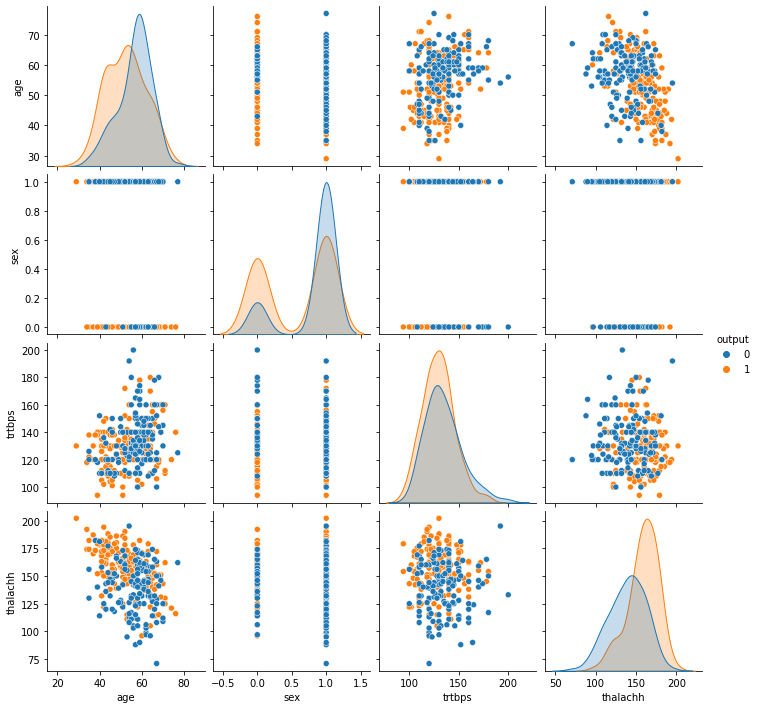

In [5]:
#vypis vzťahov medzi vekom, pohlavým, tepom v kludnom stave a maximálnim tepom
sns.pairplot(data=df1, hue='output')

In [6]:
keras_model = Sequential()

#testovanie presnosti s roznou denistou neuronu a roznimy aktivačnými funkciami
#testované aktivačné funkcie tanh, relu, sigmoid
##############################################################
#variacia 1 presnost 41.70%
# keras_model.add(Dense(10, input_dim=4, activation='sigmoid'))
# keras_model.add(Dense(5, activation='sigmoid'))
# keras_model.add(Dense(1, activation='relu'))
#variacia 2 44.07%
# keras_model.add(Dense(10, input_dim=4, activation='sigmoid'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1, activation='relu'))
#variacia 3 46.92%
# keras_model.add(Dense(30,input_dim=4,activation='sigmoid'))
# keras_model.add(Dense(30,activation='sigmoid'))
# keras_model.add(Dense(3))
#variacia 4 0.0%
# keras_model.add(Dense(30, input_dim=4, activation='relu'))
# keras_model.add(Dense(30, activation='relu'))
# keras_model.add(Dense(3))
#variacia 5 52.13%
# keras_model.add(Dense(10, input_dim=4, activation='relu'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1))
#variacia 6 54.50%
# keras_model.add(Dense(10, input_dim=4, activation='relu'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1, activation='relu'))
#variacia 7 57.34%
# keras_model.add(Dense(10, input_dim=4, activation='sigmoid'))
# keras_model.add(Dense(5, activation='sigmoid'))
# keras_model.add(Dense(1, activation='sigmoid'))
#variacia 8 68.25%
# keras_model.add(Dense(10, input_dim=4, activation='relu'))
# keras_model.add(Dense(5, activation='relu'))
# keras_model.add(Dense(1, activation='sigmoid'))
############################################################
keras_model.add(Dense(10, input_dim=4, activation='relu'))
keras_model.add(Dense(5, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

In [7]:
# testovanie loss a optimizer
####################################
# keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# keras_model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])
# keras_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
# keras_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
####################################
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = keras_model.fit(maticax_trenovacia, maticay_trenovacia, validation_data=(maticax_testovacie, maticay_testovacie), epochs=10, batch_size=100)
scores=keras_model.evaluate(maticax_trenovacia,maticay_trenovacia)

Epoch 1/10
3/3 [==============================] - 1s 502ms/step - loss: 3.3774 - accuracy: 0.6059 - val_loss: 3.8669 - val_accuracy: 0.6044
Epoch 2/10
3/3 [==============================] - 0s 20ms/step - loss: 2.9698 - accuracy: 0.6036 - val_loss: 3.8375 - val_accuracy: 0.5824
Epoch 3/10
3/3 [==============================] - 0s 18ms/step - loss: 2.7019 - accuracy: 0.6075 - val_loss: 3.9337 - val_accuracy: 0.5824
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 2.9781 - accuracy: 0.5776 - val_loss: 3.9521 - val_accuracy: 0.5604
Epoch 5/10
3/3 [==============================] - 0s 19ms/step - loss: 2.8371 - accuracy: 0.5813 - val_loss: 3.8710 - val_accuracy: 0.5714
Epoch 6/10
3/3 [==============================] - 0s 18ms/step - loss: 2.8125 - accuracy: 0.5765 - val_loss: 3.7333 - val_accuracy: 0.5714
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 2.8804 - accuracy: 0.6022 - val_loss: 3.6509 - val_accuracy: 0.5934
Epoch 8/10
3/3 [==========

In [8]:
# výpis názvou premených pre vyzualizáciu učenia neurónovej siete
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


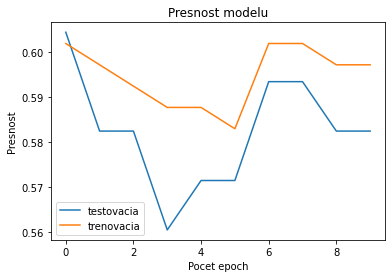

In [9]:
#graf presnosti modelu
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Pocet epoch')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

In [10]:
print((scores[1]*100))

59.71564054489136


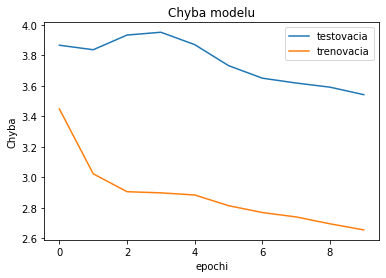

In [11]:
#graf chyby modelu
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Chyba modelu')
plt.ylabel('Chyba')
plt.xlabel('epochi')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

In [16]:
#vytvorenie dát pre predikciu
predict_data = {'age':[25],
                'sex':[0],
                'trtbps':[115],
                'thalachh':[125]}
# zápis do nového dataframu
Xnew = pd.DataFrame(predict_data)

In [17]:
# výpis vstupných dát pre predikciu
Xnew

age  sex  trtbps  thalachh
0   25    0     115       125

In [18]:
# ynew je predikovaná premená output (funcia predict z knižnice keras)
ynew = keras_model.predict(Xnew)

In [20]:
# zápis predikovanej premenej do dataframu
#uprava dát na nami potrebý výtup nakolko premené pod tresholdom 0.99 bi mali biť 0 a nad 1

Xnew['output']=math.trunc(ynew.item(0))
Xnew

age  sex  trtbps  thalachh  output
0   25    0     115       125       0